# ME2


## Preprocessing Data: Data Clearning

#### Write full names of your team members who worked together.

Wesley Wong

Kevin Khong


#### Submission:

- Push the completed code to your Github repository.

- Check submission details in Canvas. 

### Handing missing data and invalid data

Handling missing data is important as many machine learning algorithms do not support data with missing values. Our main objectives: 

- How to marking invalid or corrupt values as missing in a dataset.

- How to remove rows with missing data from a dataset.

- How to impute missing values with mean values in a dataset.

#### Two examples below will show the data cleaning process. 

- Learn from the examples by going through each cell.

- Apply the learn tools to conduct preprocessing a new dataset. 


See the more details:

- Working with mssing data, in Pandas: 

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

- How to inteporate the data, in Pandas: 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html

- Imputation of missing values, in Scikit-learn: 

https://scikit-learn.org/stable/modules/impute.html#impute


*** Notes: It is import to read the Pandas and Scikit-learn libraries for their functions and examples before you use them.



### A simple example: filling in missing data using Pandas

In [85]:
# Library import
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [86]:
# Load the data
# data file is located in folder data
df = pd.read_csv('./data/log.csv')
print(df.head())
print(df.tail())

         time    user       video  playback position paused  volume
0  1469974424  cheryl  intro.html                  5  False    10.0
1  1469974454  cheryl  intro.html                  6    NaN     NaN
2  1469974544  cheryl  intro.html                  9    NaN     NaN
3  1469974574  cheryl  intro.html                 10    NaN     NaN
4  1469977514     bob  intro.html                  1    NaN     NaN
          time    user       video  playback position paused  volume
28  1469977664     bob  intro.html                  1    NaN     NaN
29  1469974634  cheryl  intro.html                 12    NaN     NaN
30  1469974664  cheryl  intro.html                 13    NaN     NaN
31  1469977694     bob  intro.html                  1    NaN     NaN
32  1469977724     bob  intro.html                  1    NaN     NaN


In [87]:
# you can make index
df = df.set_index('time')
df = df.sort_index()
print(df.head())

              user          video  playback position paused  volume
time                                                               
1469974424  cheryl     intro.html                  5  False    10.0
1469974424     sue  advanced.html                 23  False    10.0
1469974454  cheryl     intro.html                  6    NaN     NaN
1469974454     sue  advanced.html                 24    NaN     NaN
1469974484  cheryl     intro.html                  7    NaN     NaN


In [88]:
# reset index
df = df.reset_index()
df = df.set_index(['time', 'user'])
print(df.head())

                           video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 cheryl     intro.html                  6    NaN     NaN
           sue     advanced.html                 24    NaN     NaN
1469974484 cheryl     intro.html                  7    NaN     NaN


In [89]:
# replace Nan with default value (previos value is used to fill in)
df = df.fillna(method='ffill')
print(df.head())
print(df.tail())

                           video  playback position  paused  volume
time       user                                                    
1469974424 cheryl     intro.html                  5   False    10.0
           sue     advanced.html                 23   False    10.0
1469974454 cheryl     intro.html                  6   False    10.0
           sue     advanced.html                 24   False    10.0
1469974484 cheryl     intro.html                  7   False    10.0
                      video  playback position  paused  volume
time       user                                               
1469977604 bob   intro.html                  1    True    10.0
1469977634 bob   intro.html                  1    True    10.0
1469977664 bob   intro.html                  1    True    10.0
1469977694 bob   intro.html                  1    True    10.0
1469977724 bob   intro.html                  1    True    10.0


## Part 0
### Data Clearning Exercise

Pima Indians Diabetes Dataset: where we look at a dataset that has known missing values.
Mark Missing Values: where we learn how to mark missing values in a dataset.
Missing Values Causes Problems: where we see how a machine learning algorithm can fail when it contains missing values.
Remove Rows With Missing Values: where we see how to remove rows that contain missing values.
Impute Missing Values: where we replace missing values with sensible values.
Algorithms that Support Missing Values: where we learn about algorithms that support missing values.

1. Pima Indians Diabetes Dataset: where we look at a dataset that has known missing values.
2. Mark Missing Values: where we learn how to mark missing values in a dataset.
3. Missing Values Causes Problems: where we see how a machine learning algorithm can fail when it contains missing values.
4. Remove Rows With Missing Values: where we see how to remove rows that contain missing values.
5. Impute Missing Values: where we replace missing values with sensible values.
6. Algorithms that Support Missing Values: where we learn about algorithms that support missing values.

### 1. Dataset
#### Working with Pima indians diabetes dataset



#### In the folder of "data", you can find the follwoing files from folder data:

- pima-indians-diabetes.csv

- pima-indians-diabetes.names

Both can be opend in Jupyter notebook

#### Open the data file and look at the data. Also read readme.txt for data descrption. 

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. The variable names are as follows:

0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Class variable (0 or 1).

The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 65%. Top results achieve a classification accuracy of approximately 77%.

A sample of the first 5 rows is listed below.

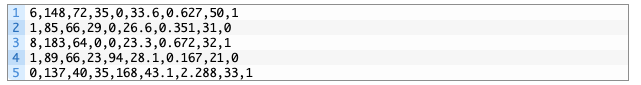

This dataset is known to have missing values. Specifically, there are missing observations for some columns that are marked as a zero value.

We can corroborate this by the definition of those columns and the domain knowledge that a zero value is invalid for those measures, e.g. a zero for body mass index or blood pressure is invalid.

### 2. Mark Missing Values

we will look at how we can identify and mark values as missing.

We can use plots and summary statistics to help identify missing or corrupt data.

We can load the dataset as a Pandas DataFrame and print summary statistics on each attribute.

In [90]:
df = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)

print(df.describe())
            

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

We can see that there are columns that have a minimum value of zero (0). On some columns, a value of zero does not make sense and indicates an invalid or missing value.

Specifically, the following columns have an invalid zero minimum value:

1: Plasma glucose concentration

2: Diastolic blood pressure

3: Triceps skinfold thickness

4: 2-Hour serum insulin

5: Body mass index

In [91]:
print(df.head(20))

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


We can get a count of the number of missing values on each of these columns. We can do this my marking all of the values in the subset of the DataFrame we are interested in that have zero values as True. We can then count the number of true values in each column.

We can do this my marking all of the values in the subset of the DataFrame we are interested in that have zero values as True. We can then count the number of true values in each column.

In [92]:
print((df[[1,2,3,4,5]] == 0).sum())

1      5
2     35
3    227
4    374
5     11
dtype: int64


We can see that columns 1,2 and 5 have just a few zero values, whereas columns 3 and 4 show a lot more, nearly half of the rows. This highlights that different “missing value” strategies may be needed for different columns, e.g. to ensure that there are still a sufficient number of records left to train a predictive model.

In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN. Values with a NaN value are ignored from operations like sum, count, etc.

We can mark values as NaN easily with the Pandas DataFrame by using the replace() function on a subset of the columns we are interested in.

After we have marked the missing values, we can use the isnull() function to mark all of the NaN values in the dataset as True and get a count of the missing values for each column.

In [93]:
# mark zero values as missing or NaN
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.NaN)

# count the number of NaN values in each column
print(df.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


Running the example prints the number of missing values in each column. We can see that the columns 1:5 have the same number of missing values as zero values identified above. This is a sign that we have marked the identified missing values correctly.

We can see that the columns 1 to 5 have the same number of missing values as zero values identified above. This is a sign that we have marked the identified missing values correctly.

In [94]:
print(df.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

Running the example, we can clearly see NaN values in the columns 2, 3, 4 and 5. There are only 5 missing values in column 1, so it is not surprising we did not see an example in the first 20 rows.

It is clear from the raw data that marking the missing values had the intended effect.

### 3. Missing Values Causes Problems

Before we look at handling missing values, let’s first demonstrate that having missing values in a dataset can cause problems.

Having missing values in a dataset can cause errors with some machine learning algorithms. We will try to evaluate a the Linear Discriminant Analysis (LDA) algorithm on the dataset with missing values. This is an algorithm that does not work when there are missing values in the dataset.

The below example marks the missing values in the dataset, as we did in the previous sectio (changing 0 to Nan), then attempts to evaluate LDA using 3-fold cross validation and print the mean accuracy.

*** Notes: The LDA algorithm and 3-fold cross validation will be discussed in class later. 

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

df = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.NaN)

# split dataset into inputs and outputs
values = df.values
X = values[:,0:8]
y = values[:,8]

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3)

result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

nan


/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 544, in fit
    X, y = self._validate_data(
  File "/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/opt/homebrew/lib/python3.9/site-p

Running the example results in an error, as follows:
    
This is as we expect.

We are prevented from evaluating an LDA algorithm (and other algorithms) on the dataset with missing values.

Now, we can look at methods to handle the missing values.


### 4. Remove Rows With Missing Values

The simplest strategy for handling missing data is to remove records that contain a missing value.

We can do this by creating a new Pandas DataFrame with the rows containing missing values removed.

Pandas provides the dropna() function that can be used to drop either columns or rows with missing data. We can use dropna() to remove all rows with missing data, as follows:

In [96]:
dataset = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.NaN)

# drop rows with missing values
df.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(df.shape)

(392, 9)


Running this example, we can see that the number of rows has been aggressively cut from 768 in the original dataset to 392 with all rows containing a NaN removed.

We now have a dataset that we could use to evaluate an algorithm sensitive to missing values like LDA.

In [97]:
df = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.NaN)

# drop rows with missing values
df.dropna(inplace=True)
# split dataset into inputs and outputs
values = df.values
X = values[:,0:8]
y = values[:,8]
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.7832648267762772


The example runs successfully and prints the accuracy of the model.

Removing rows with missing values can be too limiting on some predictive modeling problems, an alternative is to impute missing values.

### 5. Impute Missing Values

Imputing refers to using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:

- A constant value that has meaning within the domain, such as 0, distinct from all other values.

- A value from another randomly selected record.

- A mean, median or mode value for the column.

- A value estimated by another predictive model.

Any imputing performed on the training dataset will have to be performed on new data in the future when predictions are needed from the finalized model. This needs to be taken into consideration when choosing how to impute the missing values.

- For example, if you choose to impute with mean column values, these mean column values will need to be stored to file for later use on new data that has missing values.

Pandas provides the fillna() function for replacing missing values with a specific value.

- For example, we can use fillna() to replace missing values with the mean value for each column, as follows:

### Using Pandas

In [98]:
df = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)

# mark zero values as missing or NaN
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.NaN)
print(df.head(5))

# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)
# count the number of NaN values in each column

print(df.head(5))

print(df.isnull().sum())

   0      1     2     3      4     5      6   7  8
0  6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1  1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2  8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3  1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4  0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
   0      1     2         3           4     5      6   7  8
0  6  148.0  72.0  35.00000  155.548223  33.6  0.627  50  1
1  1   85.0  66.0  29.00000  155.548223  26.6  0.351  31  0
2  8  183.0  64.0  29.15342  155.548223  23.3  0.672  32  1
3  1   89.0  66.0  23.00000   94.000000  28.1  0.167  21  0
4  0  137.0  40.0  35.00000  168.000000  43.1  2.288  33  1
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


### Using Scikit-learn

#### SimpleImputer

The scikit-learn library provides the SimpleImputer() class that can be used to replace missing values.

It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). The Imputer class operates directly on the NumPy array instead of the DataFrame.

The example below uses the Imputer class to replace missing values with the mean of each column then prints the number of NaN values in the transformed matrix.

In [99]:
from sklearn.impute import SimpleImputer

df = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.NaN)

# fill missing values with mean column values
values = df.values
imputer = SimpleImputer()
transformed_values = imputer.fit_transform(values)

# count the number of NaN values in each column
print(np.isnan(transformed_values).sum())

0


Running the example shows that all NaN values were imputed successfully.

In either case, we can train algorithms sensitive to NaN values in the transformed dataset, such as LDA.

The example below shows the LDA algorithm trained in the Imputer transformed dataset.

In [100]:
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

df = pd.read_csv('./data/pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.NaN)

# split dataset into inputs and outputs
values = df.values
X = values[:,0:8]
y = values[:,8]

# fill missing values with mean column values
imputer = SimpleImputer()
transformed_X = imputer.fit_transform(X)

# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
result = cross_val_score(model, transformed_X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.765625


Running the example prints the accuracy of LDA on the transformed dataset.

Try replacing the missing values with other values and see if you can lift the performance of the model.

Maybe missing values have meaning in the data.

Next we will look at using algorithms that treat missing values as just another value when modeling.

### 6. Algorithms that Support Missing Values

Not all algorithms fail when there is missing data.

There are algorithms that can be made robust to missing data, such as k-Nearest Neighbors that can ignore a column from a distance measure when a value is missing. There are also algorithms that can use the missing value as a unique and different value when building the predictive model, such as classification and regression trees. Sadly, the scikit-learn implementations of decision trees and k-Nearest Neighbors are not robust to missing values. Although it is being considered.

Nevertheless, this remains as an option if you consider using another algorithm implementation (such as xgboost) or developing your own implementation.

### More details

- See examples of handling missing data at Pandas: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

- See also examples of imputating missing data at Scikit-learn:
https://scikit-learn.org/stable/modules/impute.html#impute

Reference:
- Data clearning example with Pima Indians Diabetes dataset was created by Jason Brownlee and modified by Wan Bae. 

## ME2 Part 1

Dataset: ./data/daily-temperatures.csv

Daily minimum and maximum temperatures (in Celsius) in Melbourne, Australia, 1981-1990

Source: Time Series Data Library (citing: Australian Bureau of Meteorology)


This dataset has known missing values and also incorrect values

- no value is reported so no value in some cells

- invalid values for temperature: You can see some temprature values >= 200 and <= -800, which are invalid

(1) First, you may want to plot the each max temperature and min temperature or both to check the ranges of the data. You may find something incorrect from the plot(s).

(2) Discuss how you would handle these values: missing values and invalid values

(3) Use tools (in Pandas and Scikit-learn) we talked about in the above examples to process data.

(4) Visualize the data. 

<AxesSubplot:xlabel='Date'>

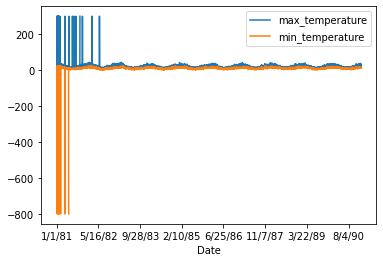

In [162]:
df = pd.read_csv('./data/daily-temperatures.csv', header = 0)
df["max_temperature"] = pd.to_numeric(df["max_temperature"], downcast="float", errors = 'coerce')
df["min_temperature"] = pd.to_numeric(df["min_temperature"], downcast="float", errors = 'coerce')
df.plot(x='Date')

#2
We will first mark the NaN and invalid values, as listed above, and then impute mean values into the invalid values.

In [158]:
#3
#invalid values for temperature: You can see some temprature values >= 200 and <= -800, which are invalid

from sklearn.impute import SimpleImputer
df = pd.read_csv('./data/daily-temperatures.csv', header=0)

#convert to float
df["max_temperature"] = pd.to_numeric(df["max_temperature"], downcast="float", errors = 'coerce')
df["min_temperature"] = pd.to_numeric(df["min_temperature"], downcast="float", errors = 'coerce')

#drop all instances that are greater or less than our threshold
df.drop(df[(df['max_temperature'] >=200) | (df['max_temperature'] <= -800) ].index, inplace=True)
df.drop(df[(df['min_temperature'] >=200) | (df['min_temperature'] <= -800) ].index, inplace=True)


# fill missing values with mean column values
values = df[["min_temperature", "max_temperature"]]


#print(values)
imputer = SimpleImputer()
transformed_values = imputer.fit_transform(values)
transformed_df = pd.DataFrame(transformed_values)

#print(transformed_df)
print(transformed_df.head(20))

            0          1
0   20.700001  38.099998
1   17.900000  19.971769
2   18.799999  34.500000
3   14.600000  20.700001
4   15.800000  21.500000
5   15.800000  29.700001
6   17.400000  36.599998
7   21.799999  19.971769
8   16.200001  20.400000
9   13.300000  30.100000
10  16.700001  38.700001
11  21.500000  41.400002
12  20.600000  19.971769
13  24.799999  38.000000
14  17.700001  23.000000
15  11.150290  27.500000
16  12.100000  21.700001
17  14.400000  22.900000
18  11.150290  41.799999
19  19.400000  21.500000


<AxesSubplot:>

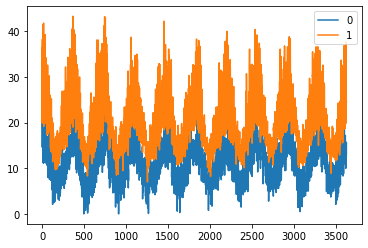

In [159]:
transformed_df.plot()

### Part 2
Write a summary of what your team has learned from this process. Submit your report to Canvas. 

Through this ME2, we learned how to mark rows that have invalid or NaN values in their rows and then remove them from the dataframe.  This allows us to actually process the data properly without weird outlier or NaN values to mess up our data. What we did was convert the data into floats, dropped the rows with invalid values and replaced the NaN values with the mean of the data from the given column.